## <font color = red> Press double arrow above to restart kernel and re-run notebook </font>

# Daily Florida Current and Mean Daily Virginia Key Tide, 2022

## Martina Rogers and Mike Sukop, Florida International University

### For on-line implementation see https://github.com/alan-turing-institute/the-turing-way/blob/master/workshops/boost-research-reproducibility-binder/workshop-presentations/zero-to-binder-python.md#running-code-is-more-complicated-than-displaying-code

###  Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, show, legend, ylabel
import json
import urllib.request
from urllib.request import urlopen
from pprint import pprint
import pandas as pd
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
import matplotlib.dates as dl
import datetime
from datetime import date, timedelta

### Download Florida Current data

In [2]:
url='https://www.aoml.noaa.gov/phod/floridacurrent/FC_cable_transport_2022.dat'
current=np.loadtxt(url,skiprows=22,usecols=(0,1,2,3))
d1 = pd.DataFrame(current,columns=['year','month','day','transport']) # converts from 4 columns to pandas data frame
d3 = {'year':'year','month':'month','day':'day'}
d1['date'] = pd.to_datetime(d1.rename(columns=d3)[list(d3.values())]) # creates date from year, month and day
print(d1.columns)
print(d1.tail())

Index(['year', 'month', 'day', 'transport', 'date'], dtype='object')
       year  month   day  transport       date
168  2022.0    6.0  18.0       36.2 2022-06-18
169  2022.0    6.0  19.0       35.2 2022-06-19
170  2022.0    6.0  20.0       33.8 2022-06-20
171  2022.0    6.0  21.0       32.6 2022-06-21
172  2022.0    6.0  22.0       32.0 2022-06-22


### Download Viginia Key predicted and observed tide

#### Estimate daily average from hourly data

In [4]:
websource = urllib.request.urlopen('https://tidesandcurrents.noaa.gov/api/datagetter?product=predictions'+\
                                   '&application=NOS.COOPS.TAC.WL&begin_date=20220101&end_date=20221231&datum=NAVD'+\
                                   '&station=8723214&time_zone=lst_ldt&units=english&interval=h&format=json')
predictions = json.loads(websource.read().decode())
#pprint(predictions)
dates_pred = [i['t'] for i in predictions["predictions"]] # extracts only time 't'
dates_pred=np.array(dates_pred, dtype='datetime64')
values_pred = [i['v'] for i in predictions['predictions']] #extracts only value 'v'
pred = {'date':dates_pred,'prediction':values_pred}
pred_df = pd.DataFrame(pred)
pred_df['year'] = pd.DatetimeIndex(pred_df['date']).year
pred_df['month'] = pd.DatetimeIndex(pred_df['date']).month
pred_df['day'] = pd.DatetimeIndex(pred_df['date']).day
pred_df['prediction'] = pd.to_numeric(pred_df['prediction'], errors ='coerce')
g_day = pred_df.groupby(['year', 'month','day'])
daily_mean_pred = g_day.aggregate({'prediction':np.mean})
daily_mean_pred = daily_mean_pred.reset_index()
#print (daily_mean_pred.reset_index())

websource1 = urllib.request.urlopen('https://tidesandcurrents.noaa.gov/api/datagetter?begin_date=20220101' + \
                                    '&end_date=20221231&station=8723214&product=hourly_height&datum=NAVD&units=english' + \
                                    '&time_zone=lst_ldt&interval=h&application=NOS.COOPS.TAC.WL&format=json')
observations = json.loads(websource1.read().decode())
dates_obs = [i['t'] for i in observations["data"]]
dates_obs = np.array(dates_obs, dtype='datetime64')
values_obs = [i['v'] for i in observations['data']]
obs = {'date':dates_obs,'observed':values_obs}
obs_df = pd.DataFrame(obs)
obs_df['year'] = pd.DatetimeIndex(obs_df['date']).year
obs_df['month'] = pd.DatetimeIndex(obs_df['date']).month
obs_df['day'] = pd.DatetimeIndex(obs_df['date']).day
obs_df['observed'] = pd.to_numeric(obs_df['observed'], errors ='coerce')
 
g_day1 = obs_df.groupby(['year', 'month','day'])
daily_mean_obs1 = g_day1.aggregate({'observed':np.mean})
daily_mean_obs1 = daily_mean_obs1.reset_index()
daily_mean_obs = daily_mean_obs1.iloc[:-1,:]
print(json.dumps(dict(websource1.headers)))
print(daily_mean_pred.tail())
print(daily_mean_obs)

{"Date": "Sun, 26 Jun 2022 18:05:45 GMT", "Content-Type": "application/json;charset=ISO-8859-1", "Content-Length": "227011", "Connection": "close", "x-amzn-RequestId": "d50695c2-5180-4b96-b2ed-15935318d6d8", "Access-Control-Allow-Origin": "*", "Access-Control-Allow-Headers": "X-Requested-With", "x-amzn-Remapped-Connection": "keep-alive", "x-amz-apigw-id": "UV3u7FdvoAMFgBw=", "Cache-Control": "no-cache,no-store,must-revalidate", "x-amzn-Remapped-Server": "nginx/1.20.0", "Expires": "Thu, 01 Jan 1970 00:00:00 GMT", "Pragma": "no-cache", "x-amzn-Remapped-Date": "Sun, 26 Jun 2022 18:05:45 GMT"}
     year  month  day  prediction
360  2022     12   27   -1.050417
361  2022     12   28   -1.042417
362  2022     12   29   -1.027958
363  2022     12   30   -1.014375
364  2022     12   31   -1.011500
     year  month  day  observed
0    2022      1    1 -0.380792
1    2022      1    2 -0.443250
2    2022      1    3 -0.595042
3    2022      1    4 -0.482667
4    2022      1    5 -0.381042
..    .

### Preliminary observed data

In [5]:
today = date.today() - timedelta(1)
end_date = str(today.strftime("%Y%m%d"))
start = date.today() - timedelta(30)
start_date = str(start.strftime("%Y%m%d"))
start2 = date.today() - timedelta(60)
start_date2 = str(start2.strftime("%Y%m%d"))
print("Start date:", start_date2)
print("End date:", end_date)
url= ('https://tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date={}'+\
      '&end_date={}&station=8723214&datum=NAVD&product=water_level&units=english'+
      '&time_zone=lst&interval=h&application=NOS.COOPS.TAC.WL&format=csv').format(start_date,end_date)
url1= ('https://tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date={}'+\
      '&end_date={}&station=8723214&datum=NAVD&product=water_level&units=english'+
      '&time_zone=lst&interval=h&application=NOS.COOPS.TAC.WL&format=csv').format(start_date2,start_date)
df1 = pd.read_csv(url)
df2 = pd.read_csv(url1)
wl_df = pd.concat([df2, df1], axis=0) 
#print(wl_df)
wl_df['date']= pd.to_datetime(wl_df['Date Time'])
wl_df['year'] = pd.DatetimeIndex(wl_df['Date Time']).year
wl_df['month'] = pd.DatetimeIndex(wl_df['Date Time']).month
wl_df['day'] = pd.DatetimeIndex(wl_df['Date Time']).day
#wl_df[' Water Level'] = pd.to_numeric(wl_df[' Water Level'], errors ='coerce')
wl_df['water_level'] = wl_df[' Water Level']
g_day2 = wl_df.groupby(['year', 'month','day'])
daily_mean_wl = g_day2.aggregate({'water_level':np.mean})
daily_mean_wl = daily_mean_wl.reset_index()
print(daily_mean_wl)

Start date: 20220427
End date: 20220625
    year  month  day  water_level
0   2022      4   27    -0.550896
1   2022      4   28    -0.557721
2   2022      4   29    -0.563992
3   2022      4   30    -0.648646
4   2022      5    1    -0.599708
5   2022      5    2    -0.631554
6   2022      5    3    -0.708171
7   2022      5    4    -0.794900
8   2022      5    5    -0.736442
9   2022      5    6    -0.622563
10  2022      5    7    -0.492996
11  2022      5    8    -0.373988
12  2022      5    9    -0.218425
13  2022      5   10     0.009200
14  2022      5   11     0.192379
15  2022      5   12     0.591425
16  2022      5   13     0.491475
17  2022      5   14     0.267667
18  2022      5   15     0.144329
19  2022      5   16     0.054133
20  2022      5   17    -0.168675
21  2022      5   18    -0.371308
22  2022      5   19    -0.374479
23  2022      5   20    -0.302696
24  2022      5   21    -0.273029
25  2022      5   22    -0.284262
26  2022      5   23    -0.323554
27  2022

### Estimate tide residuals

In [6]:
tide1 = daily_mean_pred.merge(daily_mean_obs, how='left', on=['year','month','day'])
tide = tide1.merge(daily_mean_wl, how='left', on=['year','month','day'])
tide['residuals'] = tide['observed'] - tide['prediction']
tide['residuals_prelim'] = tide['water_level'] - tide['prediction']
tide['day'] = pd.to_datetime(tide['day'], format='%j').dt.strftime('%d')
d3 = {'year':'year','month':'month','day':'day'}
tide['date'] = pd.to_datetime(tide.rename(columns=d3)[list(d3.values())])
#tide = tide.dropna(subset=['residuals', 'residuals_prelim'], how='all')
print(tide.columns)
print(tide)

Index(['year', 'month', 'day', 'prediction', 'observed', 'water_level',
       'residuals', 'residuals_prelim', 'date'],
      dtype='object')
     year  month day  prediction  observed  water_level  residuals  \
0    2022      1  01   -1.001792 -0.380792          NaN   0.621000   
1    2022      1  02   -1.034292 -0.443250          NaN   0.591042   
2    2022      1  03   -1.071542 -0.595042          NaN   0.476500   
3    2022      1  04   -1.105250 -0.482667          NaN   0.622583   
4    2022      1  05   -1.126875 -0.381042          NaN   0.745833   
..    ...    ...  ..         ...       ...          ...        ...   
360  2022     12  27   -1.050417       NaN          NaN        NaN   
361  2022     12  28   -1.042417       NaN          NaN        NaN   
362  2022     12  29   -1.027958       NaN          NaN        NaN   
363  2022     12  30   -1.014375       NaN          NaN        NaN   
364  2022     12  31   -1.011500       NaN          NaN        NaN   

     residuals_p

### Moons

In [7]:
Perigee = [pd.to_datetime('2022-01-01'),pd.to_datetime('2022-01-30'),pd.to_datetime('2022-02-26'),pd.to_datetime('2022-03-23'),
           pd.to_datetime('2022-04-19'),pd.to_datetime('2022-05-17'),pd.to_datetime('2022-06-14'),pd.to_datetime('2022-07-13'),
           pd.to_datetime('2022-08-10'),pd.to_datetime('2022-09-07'),pd.to_datetime('2022-10-04'),
           pd.to_datetime('2022-10-29'),pd.to_datetime('2022-11-25'),pd.to_datetime('2022-12-24')]

Apogee = [pd.to_datetime('2022-01-14'),pd.to_datetime('2022-02-10'),pd.to_datetime('2022-03-10'),
          pd.to_datetime('2022-04-07'),pd.to_datetime('2022-05-05'),pd.to_datetime('2022-06-01'),
          pd.to_datetime('2022-06-29'),pd.to_datetime('2022-07-26'),pd.to_datetime('2022-08-22'),
          pd.to_datetime('2022-09-29'),pd.to_datetime('2022-10-17'),pd.to_datetime('2022-11-14'),
          pd.to_datetime('2022-12-11')]

### Plot predicted and observed tide at Virginia Key

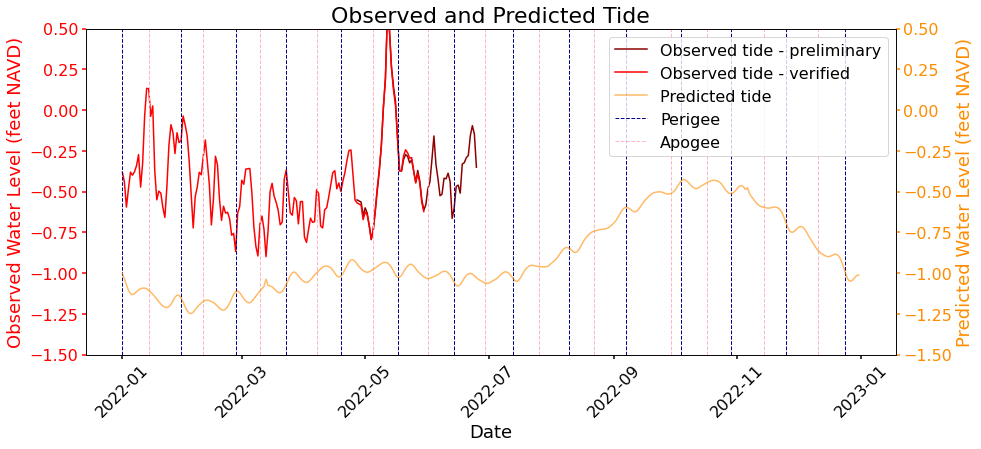

In [8]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
fig.subplots_adjust(right=0.75)

ax1 = ax.twinx()
p1, = ax.plot(tide['date'], tide['water_level'], color='darkred', label="Observed tide - preliminary")
p2, = ax.plot(tide['date'], tide['observed'], color='red', label="Observed tide - verified")
p3, = ax1.plot(tide['date'], tide['prediction'], 'darkorange', alpha=0.6, label="Predicted tide")
for xp in Perigee:
    p5 = ax.axvline(x=xp, color='darkblue', linestyle='--', lw=1, label='Perigee')
for xa in Apogee:
    p6 = ax.axvline(x=xa, color='lightpink', linestyle='--', lw=1, label='Apogee')

ax.set_xlabel("Date", fontsize= 18)
ax.set_ylabel("Observed Water Level (feet NAVD)", fontsize= 18)
ax1.set_ylabel("Predicted Water Level (feet NAVD)", fontsize= 18)
ax1.set_title('Observed and Predicted Tide', fontsize=22)
ax.set_ylim([-1.5,0.5])
ax1.set_ylim([-1.5,0.5])
#ax.set_xlim(['2021-01','2022-01'])

ax.yaxis.label.set_color(p2.get_color())
ax1.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize = 16)
ax1.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize = 16)
ax.tick_params(axis='x', **tkw, rotation=45,labelsize = 16)

lines = [p1, p2,p3,p5,p6]
ax.legend(lines, [l.get_label() for l in lines], fontsize = 16)

plt.show()

### Plot Tide Residuals

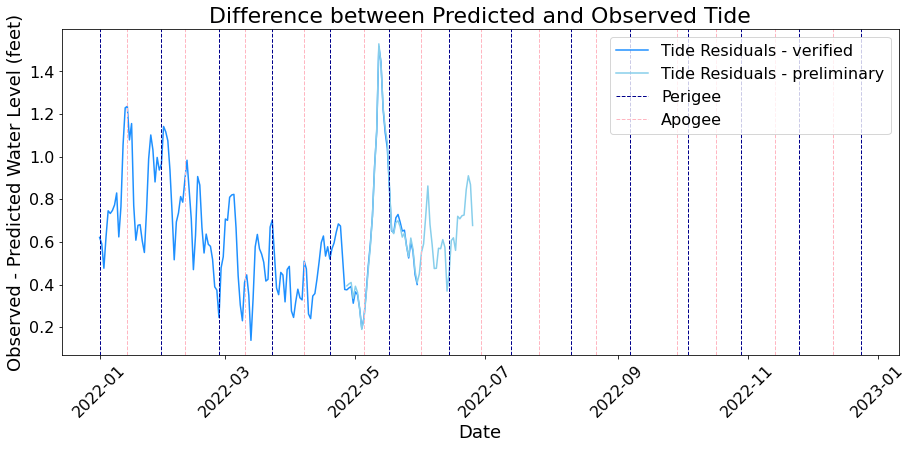

In [9]:
fig = plt.figure(figsize=(15,6))
p1, =plt.plot(tide['date'], tide['residuals'],'-', color='dodgerblue', label='Tide Residuals - verified')
p2, =plt.plot(tide['date'], tide['residuals_prelim'],'-', color='skyblue', label='Tide Residuals - preliminary')
for xp in Perigee:
    p5 =plt.axvline(x=xp, color='darkblue', linestyle='--', lw=1, label='Perigee')
for xa in Apogee:
    p6 =plt.axvline(x=xa, color='lightpink', linestyle='--', lw=1, label='Apogee')
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Observed - Predicted Water Level (feet)", fontsize=18)
plt.title("Difference between Predicted and Observed Tide", fontsize=22)
lines = [p1, p2,p5,p6]
plt.legend(lines,[l.get_label() for l in lines],loc='upper right',fontsize=16)

### Plot Florida Current

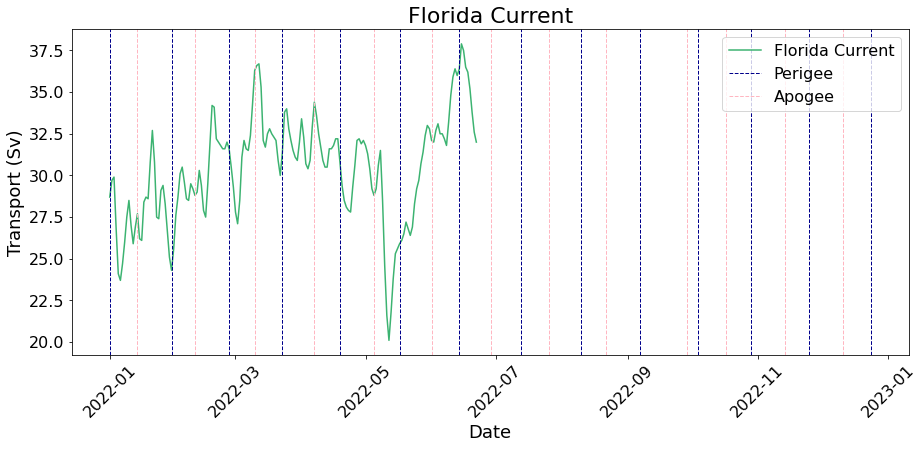

In [10]:
fig = plt.figure(figsize=(15,6))
p1, = plt.plot(d1['date'],d1['transport'],'-', color='mediumseagreen', label = 'Florida Current')
for xp in Perigee:
    p5 =plt.axvline(x=xp, color='darkblue', linestyle='--', lw=1, label='Perigee')
for xa in Apogee:
    p6 =plt.axvline(x=xa, color='lightpink', linestyle='--', lw=1, label='Apogee')
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Transport (Sv)", fontsize=18)
plt.title("Florida Current", fontsize=22)
lines = [p1, p5,p6]
plt.legend(lines,[l.get_label() for l in lines],loc='upper right',fontsize=16)

### Plot predicted and observed tide at Virginia Key, and Florida Current

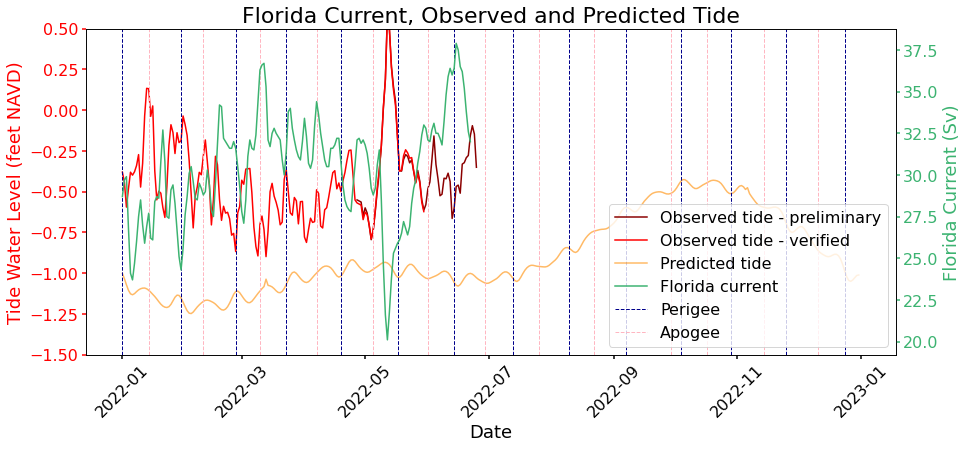

In [11]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
fig.subplots_adjust(right=0.75)

ax1 = ax.twinx()
p1, = ax.plot(tide['date'], tide['water_level'], color='darkred', label="Observed tide - preliminary")
p2, = ax.plot(tide['date'], tide['observed'], color='red', label="Observed tide - verified")
p3, = ax.plot(tide['date'], tide['prediction'], 'darkorange', alpha=0.6, label="Predicted tide")
p4, = ax1.plot(d1['date'],d1['transport'], '-', color='mediumseagreen', label="Florida current")
for xp in Perigee:
    p5 = ax.axvline(x=xp, color='darkblue', linestyle='--', lw=1, label='Perigee')
for xa in Apogee:
    p6 = ax.axvline(x=xa, color='lightpink', linestyle='--', lw=1, label='Apogee')

ax.set_xlabel("Date", fontsize= 18)
ax.set_ylabel("Tide Water Level (feet NAVD)", fontsize= 18)
ax1.set_ylabel("Florida Current (Sv)", fontsize= 18)
ax1.set_title('Florida Current, Observed and Predicted Tide', fontsize=22)
ax.set_ylim([-1.5,0.5])
#ax1.set_ylim([-1.5,0.5])

ax.yaxis.label.set_color(p2.get_color())
ax1.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize = 16)
ax1.tick_params(axis='y', colors=p4.get_color(), **tkw,labelsize = 16)
ax.tick_params(axis='x', **tkw, rotation=45,labelsize = 16)

lines = [p1, p2,p3,p4,p5,p6]
ax.legend(lines, [l.get_label() for l in lines],loc='lower right', fontsize = 16)

plt.show()

### Plot Florida Current and Tide Residuals

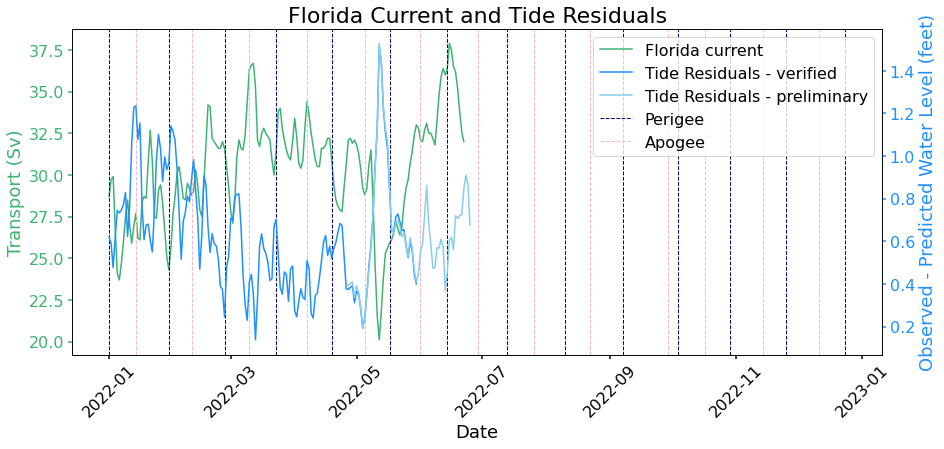

In [12]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
fig.subplots_adjust(right=0.75)

ax1 = ax.twinx()
p1, = ax.plot(d1['date'],d1['transport'], '-', color='mediumseagreen', label="Florida current")
p2, = ax1.plot(tide['date'], tide['residuals'],'-', color='dodgerblue', label="Tide Residuals - verified")
p3, = ax1.plot(tide['date'], tide['residuals_prelim'],'-', color='skyblue', label="Tide Residuals - preliminary")
for xp in Perigee:
    p5 = ax.axvline(x=xp, color='darkblue', linestyle='--', lw=1, label='Perigee')
for xa in Apogee:
    p6 = ax.axvline(x=xa, color='lightpink', linestyle='--', lw=1, label='Apogee')

ax.set_xlabel("Date", fontsize= 18)
ax.set_ylabel("Transport (Sv)", fontsize= 18)
ax1.set_ylabel("Observed - Predicted Water Level (feet)", fontsize= 18)
ax1.set_title('Florida Current and Tide Residuals', fontsize=22)

ax.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize = 16)
ax1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize = 16)
ax.tick_params(axis='x', **tkw, rotation=45,labelsize = 16)

lines = [p1, p2,p3,p5,p6]
ax.legend(lines, [l.get_label() for l in lines], fontsize = 16)

plt.show()